Veamos como usamos feed-forward en Keras

Perceptron multicapa (MLPs) 


* Capas con activación
* Dropout para regularización
* Construir un modelo sequential Dense con capas Dropout


### Dense

In [ ]:
from keras.layer import Dense

Dense(units,            # número de neuronas 
     activation=None,   # funcion de activacion by_name
     use_bias=True,     # uso o no de vias
     kernel_initializer='glorot_uniform',
     bias_initializer='zeros')

### Dropout

In [ ]:
from keras.layer import Dropout

Dropout(rate,     # porcentaje a desconectar
       seed=None) # semilla aleatoría para volver a reproducir

### Import y carga de datos

In [52]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [53]:
batch_size = 128  # 
num_classes = 10  # prediciones 0-9
epochs = 20

(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [54]:
print(x_train.shape)

(60000, 28, 28)


In [55]:
print(x_test.shape)

(10000, 28, 28)


Como podemos ver tenemos 60.000 datos de entrenamiento y 10.000 datos para test.

Con imagenes de 28*28 que representa digitos escritos a mano


In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

Digit class: 5


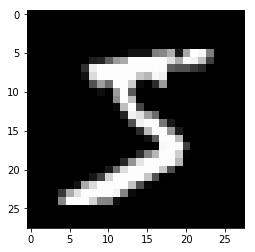

In [57]:
plt.imshow(x_train[0], 'gray')
print("Digit class:", y_train[0])

En la variable y tenemos la clase a la que pertenece

In [58]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Procesamiento de datos

Vamos a preparar los datos de la imagen para que Keras los acepte

redimensionar  
convertir a float  
normalizar  
cargar como categorías la salida  

In [59]:
tam_train = 60000
tam_test  = 10000
tam_pixeles = 28*28 # 784


x_train = x_train.reshape(tam_train,tam_pixeles)
x_test  = x_test.reshape(tam_test,tam_pixeles)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 

x_train /= 255
x_test  /= 255

y_train = to_categorical(y_train,num_classes)
y_test  = to_categorical(y_test ,num_classes)

In [60]:
print(x_train.shape)

(60000, 784)


## Definiendo y compilando el modelo

In [48]:
model = Sequential()
model.add(Dense(512,activation='relu',
               input_shape=(784,))) # primera capa solamente, 
                                    # longitud de los vectores

model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes,activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss='categorical_crossentropy'
              ,optimizer='sgd',
              metrics=['accuracy'])

### Entrenamos

In [62]:
model.fit(x_train,
          y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test,y_test)
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.7064 - acc: 0.8133 - val_loss: 0.4366 - val_acc: 0.8851
Epoch 2/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.4713 - acc: 0.8645 - val_loss: 0.3477 - val_acc: 0.9042
Epoch 3/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.3972 - acc: 0.8850 - val_loss: 0.3097 - val_acc: 0.9120
Epoch 4/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.3580 - acc: 0.8970 - val_loss: 0.2831 - val_acc: 0.9198
Epoch 5/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.3299 - acc: 0.9038 - val_loss: 0.2638 - val_acc: 0.9233
Epoch 6/20
60000/60000 [==============================] - 11s 189us/step - loss: 0.3076 - acc: 0.9109 - val_loss: 0.2469 - val_acc: 0.9269
Epoch 7/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.2890 - acc: 0.9163 - val_loss: 0.

In [64]:
score = model.evaluate(x_test,
                       y_test, 
                       verbose =0)

print('Test loss', score[0])
print('Test accuracy',score[1])

Test loss 0.143711302557
Test accuracy 0.9568
